# Bass Fishing Project
### Jimmy Barone, CPSC222, Fall 2022

## Introduction

* My project is on my bass fishing data that I have collected throughout my fishing outings from this past year, as well as weather data from the MeteoStat API that we used earlier in the semester during DA4. I chose to do the project on this dataset because bass fishing is something that I care about greatly and put a ton of my time into. I figure that if I can statistically analyze my fishing data using python, I should be a little bit closer to some of my goals in fishing like winning tournaments and catching giant bass. Additionally, I think that analyzing my outings not only keeps my mind on fishing during the off season, but can also help to make me a much more efficient angler on and off the water. I hope to be able to better pick which days I choose to go fishing to maximize my chance of catching a big one, as well as to better understand what variables really matter when I am out on the water, and which ones I do not need to pay as much attention to.
* Both data tables are in the .CSV format.
* The datasets are my own bass fishing dataset that I have collected throughout the year after each fishing outing, as well as weather data from the MeteoStat API. The bass fishing dataset has 56* instances and the MeteoStat dataset has 365 instances.
* In the MeteoStat data table there are 8 attributes.
    date: Date of the other data in the row.
    tavg: Average temperature of the day.
    tmin: Minimum temperature during the day.
    tmax: Maximum temperature during the day.
    prcp: Precipitation during the day in decimal inches.
    wdir: Wind direction during the day in degrees.
    wspd: Wind speed during the day in miles per hour.
    pres: Pressure during the day in mmHg
* In the Bass Fishing data table there are 15 attributes
    Date: Date of the outing.
    Lake: Name of the lake I went to.
    Lake Type: Self explanatory, could be Natural, Highland/Lowland Reservior, etc.
    Water Temp: Average water temperature on my sonar throughout the day (estimate) in fahrenheit.
    Water Temp Low: Lowest water temperature I saw on my sonar during the day in fahrenheit.
    Water Temp High: Highest water temperature I saw on my sonar during the day in fahrenheit.
    Visibility: Water visibility in feet, using a bright bait as a Secchi disk.
    5 Fish Bag: The combined weight of the largest five bass I caught that day in decimal pounds.
    Fish Caught: The number of bass I caught that day.
    Fish Caught AM: The number of bass I caught that day during AM hours.
    Fish Caught PM: The number of bass I caught that day during PM hours.
    Fish over 3.5lbs: The number of bass I caught that day during weighing over 3.5lbs.
    Hours Fished: The number of hours I fished that day (rounded).
    AM Hours: The number of AM hours I fished that day (rounded).
    PM Hours:The number of PM hours I fished that day (rounded).
* I am trying predict a few different things. I would like to predict which days I am going to catch the most fish, as well as which days I am going to catch a big fish. I would also like to know which lake I have the highest average 5 fish bag for, as well as the highest average fish caught per hour. Finally, I would like to know which lake I caught the least fish per hour at and the least fish over 3.5lbs.
* The potential impact of having this knowledge would be that I could better choose which days I should really try to get out and fish and which ones I should stay home for. Additionally, this knowledge will be broken down by if I am looking to catch numbers of fish, or big fish.
* I am the main person interested in the results, but also all of my fishing friends are very interested to know the results as I rarely fish alone and the data can often be applied to them as well as myself.



## Data Analysis

### Data Cleaning

* I performed data cleaning on both datasets. The data cleaning that I performed for the MeteoStat dataset was removal of columns with missing data, which included the columns "snow", "wpgt", and "tsun". For the Bass fishing dataset, I performed cleaning by removing a few rows that had missing information, as well as replacing some values in my "Fish Over 3.5Lbs" column so that I could just have 1's and 0's in it for my classification. I did this second cleaning after I had merged the datasets using .merge on the column "Date". In order for that merge to work, I had to go into excel on my Bass Fishing dataset and change the "Date" column to be separated by values separated by "-" instead of "/" so it would match the weather data. Once I did this, the merge worked and I was left with my merged_df_cleaned.csv file that I assigned to the name "merged_df".

In [1]:
import main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
merged_df = pd.read_csv("merged_df_cleaned.csv", index_col=0)
water_temp_df = merged_df.groupby("Water Temp")
fish_caught_df = merged_df.groupby("Fish Caught")
lake_name_obj = merged_df.groupby("Lake")
water_temp_ser = merged_df["Water Temp"]
fish_caught_ser = merged_df["Fish Caught"]
lake_name_ser = merged_df["Lake"]
Lake_names = ["Newman Lake", "Eloika Lake", "Long Lake", "Silver Lake"]


* This code is for reading in the merged_data_cleaned.csv file into the merged_df, as well as for making necessary assignments that I need in order to have the correct information for my functions to run. 

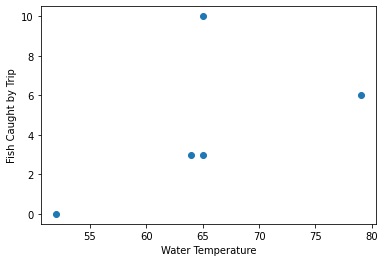

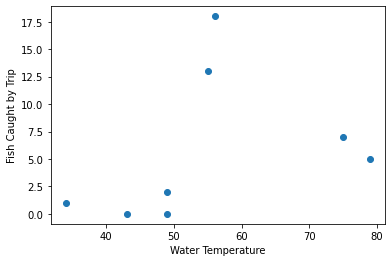

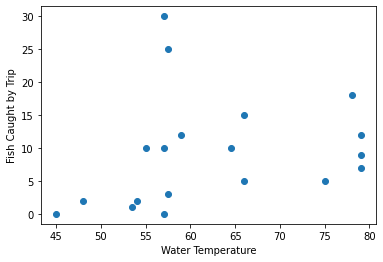

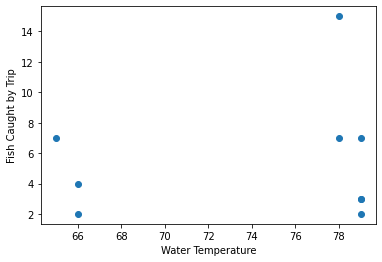

In [2]:
for Lake_Name in Lake_names:


    main.WT_vs_FC_Plot(lake_name_obj, Lake_Name)

The code above delivers a plot of the Water Temp column on the x axis and the Fish Caught(by fishing trip) column on the y axis for whatever lake name you choose from the dataset, with the exceptions of the Snake and Pend Orielle Rivers, as I only fished at each of those places once all year.

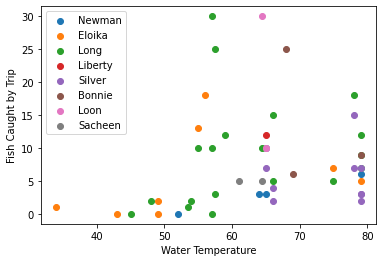

In [3]:
main.All_Lakes_WT_vs_FC_Plot(lake_name_obj)

* The function above prints out the Fish Caught vs Water Temp scatter plot for all of the lakes from the first function (and a few more) all onto one plot, with catches from each lake being color coded and easily identified from the legend.

TypeError: object of type 'numpy.float32' has no len()

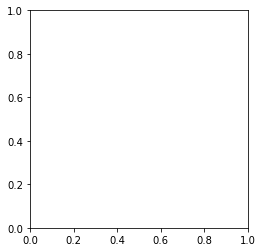

In [4]:
main.Big_Fish_Pie_Chart(merged_df)

In [ ]:
main.Long_vs_Silver_Test(lake_name_obj)

t-computed: 1.2641202426064975 p-value: 0.2174027921112861
Fail to reject H0, p-value: 0.2174027921112861


In [ ]:
main.Bigs_vs_Pressure_Test(merged_df)

t-computed: 0.05716374496276412 p-value: 0.9546257582198341
Fail to reject H0, p-value: 0.9546257582198341


In [ ]:
main.Bag_vs_WT_Test(merged_df)

t-computed: 2.706543089055977 p-value: 0.009081704297364813
Reject H0, p-value: 0.009081704297364813


In [ ]:
main.Long_Vs_Silver_Bags_Test(lake_name_obj)

t-computed: 1.6358222205102797 p-value: 0.11392693028406706
Fail to reject H0, p-value: 0.11392693028406706


In [ ]:
main.AM_vs_PM_Test(merged_df)

t-computed: 3.7799719368800453 p-value: 0.00025524748754123417
Reject H0, p-value: 0.00025524748754123417


accuracy: 0.5789473684210527


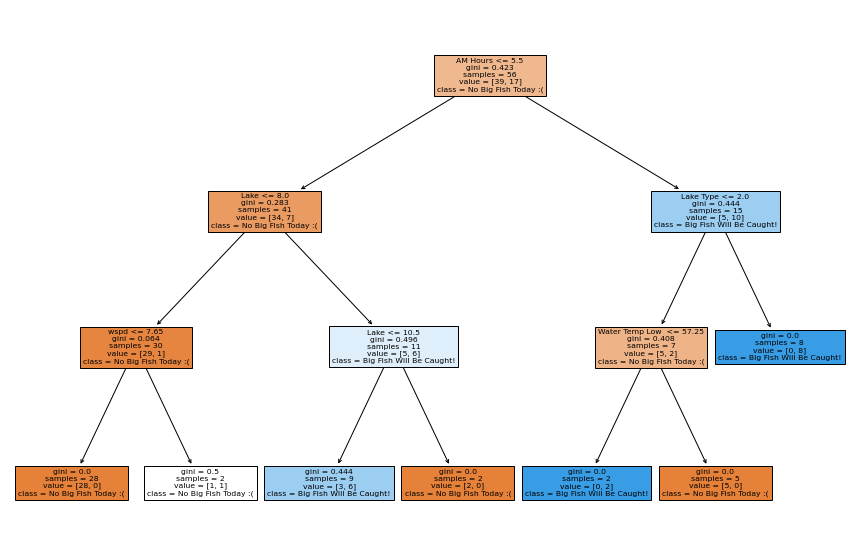

In [ ]:
le = preprocessing.LabelEncoder()
merged_df["Lake"] = le.fit_transform(merged_df["Lake"])
merged_df["Lake Type"] = le.fit_transform(merged_df["Lake Type"])

y = merged_df["Fish over 3.5lbs"]
X = merged_df.drop(["Fish over 3.5lbs", "Date", "5 Fish Bag", "Fish Caught", "Fish Caught AM", "Fish Caught PM"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.33)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

tree_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
tree_clf.fit(X, y)
plt.figure(figsize = (15, 10))
plot_tree(tree_clf, feature_names=X.columns, class_names={1: "Big Fish Will Be Caught!", 0: "No Big Fish Today :("}, filled=True)
main.Big_Fish_Dec_Tree(X_train_normalized, X_test_normalized, y_train, y_test)

In [ ]:
main.Big_Fish_kNN(X_train_normalized, X_test_normalized, y_train, y_test)

accuracy: 0.6842105263157895
